In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import InterpolatedUnivariateSpline

# Read data

In [2]:
DOSIMETRIC_DATA_SOURCE = Path(Path.cwd(), 'data.h5')

In [3]:
data_df = pd.DataFrame(pd.read_hdf(DOSIMETRIC_DATA_SOURCE, key='data'))
conditions_df = pd.DataFrame(pd.read_hdf(DOSIMETRIC_DATA_SOURCE, key='conditions'))

In [4]:
dosimetric_metadata = {}
with pd.HDFStore(DOSIMETRIC_DATA_SOURCE, mode='r') as store:
    dosimetric_metadata = store.get_storer('conditions').attrs.metadata
dosimetric_metadata

{'description': 'Dosimetric conditions.',
 'lgad_time_shift_ref': Timedelta('-1 days +22:49:12'),
 'lgad_time_shift_data': Timedelta('-1 days +22:39:02.500000')}

# Analysis

In [5]:
conditions_df[conditions_df.experiment != 'unknown']

,scan_type,driver,no_of_measurements,time_window,step_interval,axis1_start,axis1_stop,axis2_start,axis2_stop,axis3_start,axis3_stop,file_creation_timestamp,stage1_timestamp,stage2_timestamp,stage3_timestamp,stage4_timestamp,experiment,scenario
filename_core,,,,,,,,,,,,,,,,,,
2022-12-13_12_52_42,Skanowanie automatyczne,Ergen,0.0,0 days 00:00:00.100000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022-12-13 12:52:42,2022-12-13 12:52:42.700,2022-12-13 12:52:44.400,2022-12-13 13:17:09.800,2022-12-13 13:17:09.900,current_scan,0.5nA
2022-12-13_13_23_06,Skanowanie automatyczne,Ergen,0.0,0 days 00:00:00.100000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022-12-13 13:23:06,2022-12-13 13:23:07.000,2022-12-13 13:23:08.700,2022-12-13 13:49:10.800,2022-12-13 13:49:10.900,current_scan,1nA
2022-12-13_13_56_01,Skanowanie automatyczne,Ergen,0.0,0 days 00:00:00.100000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022-12-13 13:56:01,2022-12-13 13:56:01.900,2022-12-13 13:56:03.600,2022-12-13 14:17:21.800,2022-12-13 14:17:21.900,current_scan,2nA
2022-12-13_14_43_59,Skanowanie automatyczne,Ergen,0.0,0 days 00:00:00.100000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022-12-13 14:43:59,2022-12-13 14:43:59.500,2022-12-13 14:44:01.200,2022-12-13 15:39:52.100,2022-12-13 15:39:52.200,current_scan,4nA
2022-12-13_15_45_22,Skanowanie automatyczne,Ergen,0.0,0 days 00:00:00.100000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022-12-13 15:45:22,2022-12-13 15:45:22.400,2022-12-13 15:45:24.000,2022-12-13 16:03:14.100,2022-12-13 16:03:14.200,current_scan,8nA
2022-12-13_16_14_07,Skanowanie automatyczne,Ergen,0.0,0 days 00:00:00.100000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022-12-13 16:14:07,2022-12-13 16:14:07.900,2022-12-13 16:14:09.600,2022-12-13 16:27:25.100,2022-12-13 16:27:25.100,current_scan,16nA
2022-12-13_16_36_59,Skanowanie automatyczne,Ergen,0.0,0 days 00:00:00.100000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022-12-13 16:36:59,2022-12-13 16:36:59.400,2022-12-13 16:37:01.100,2022-12-13 16:38:28.100,2022-12-13 16:38:28.200,current_scan,58nA
2022-12-13_17_40_26,Skanowanie automatyczne,Skaner 3D,56.0,0 days 00:00:01,5000.0,57000.0,377000.0,225000.0,225000.0,0.0,0.0,2022-12-13 17:40:26,2022-12-13 17:40:26.500,2022-12-13 17:40:28.300,2022-12-13 18:42:14.700,2022-12-13 18:42:14.700,scan_x,ver1
2022-12-13_18_00_00,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaT,NaT,pristine_BP_steps,pos2000


In [6]:
conditions_df[conditions_df.experiment == 'current_scan'].scenario

filename_core
2022-12-13_12_52_42    0.5nA
2022-12-13_13_23_06      1nA
2022-12-13_13_56_01      2nA
2022-12-13_14_43_59      4nA
2022-12-13_15_45_22      8nA
2022-12-13_16_14_07     16nA
2022-12-13_16_36_59     58nA
Name: scenario, dtype: category
Categories (10, object): ['0.5nA', '16nA', '1nA', '2nA', ..., '8nA', 'pos2000', 'unknown', 'ver1']

## Current scan

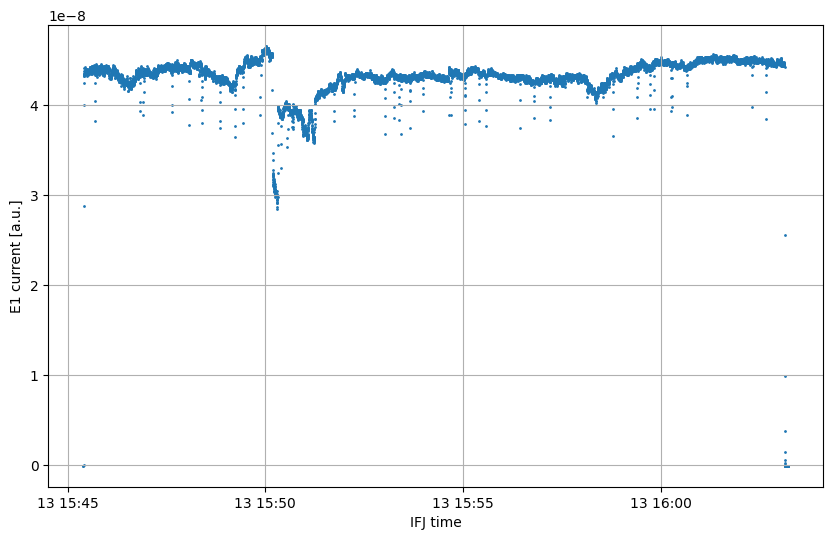

In [7]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = data_df[(data_df.experiment == 'current_scan') & (data_df.scenario == '8nA')].plot.scatter(x='timestamp', y='E1', ax=ax, s=1)
ax.grid()
ax.set_xlabel('IFJ time')
ax.set_ylabel('E1 current [a.u.]');

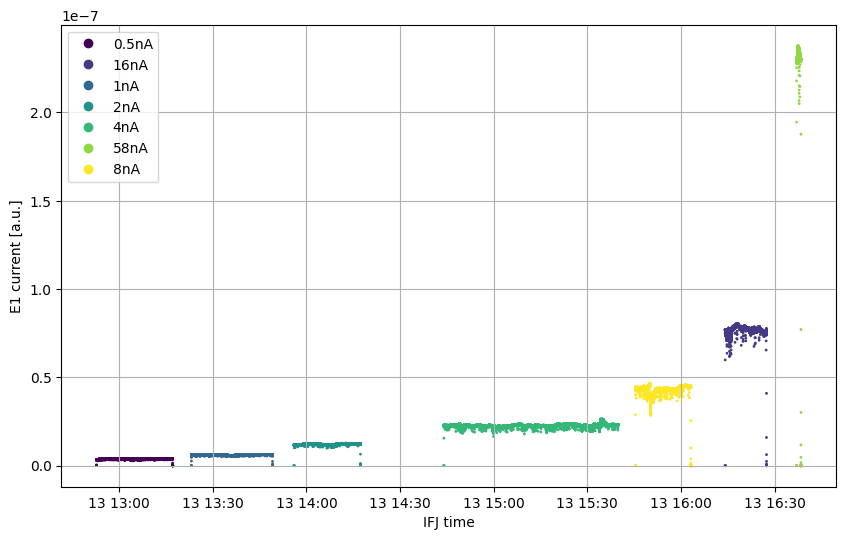

In [8]:
fig, ax = plt.subplots(figsize=(10, 6))
# number of colors = number of scenarios
scan_df = data_df[data_df.experiment == 'current_scan']
color_codes = scan_df.scenario.cat.codes
scatter_plot = ax.scatter(x='timestamp', y='E1', data=scan_df, c=color_codes, s=1)
ax.legend(scatter_plot.legend_elements()[0], scan_df.scenario.cat.categories)
ax.grid()
ax.set_xlabel('IFJ time')
ax.set_ylabel('E1 current [a.u.]');

## X scan

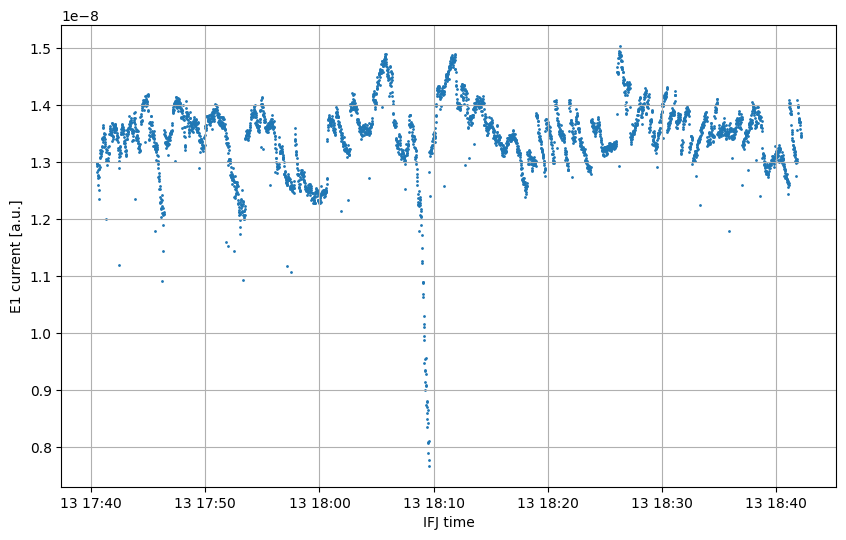

In [9]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = data_df[(data_df.experiment == 'scan_x') & (data_df.scenario == 'ver1')].plot.scatter(x='timestamp', y='E1', ax=ax, s=1)
ax.grid()
ax.set_xlabel('IFJ time')
ax.set_ylabel('E1 current [a.u.]');

## LGAD time

In [10]:
data_df['lgad_timestamp_data'] = data_df.timestamp + dosimetric_metadata['lgad_time_shift_data']

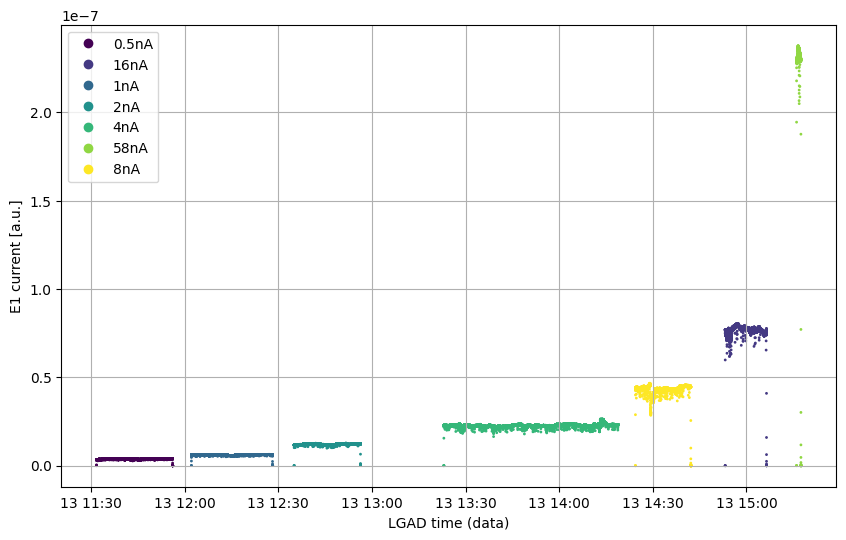

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))
# number of colors = number of scenarios
scan_df = data_df[data_df.experiment == 'current_scan']
color_codes = scan_df.scenario.cat.codes
scatter_plot = ax.scatter(x='lgad_timestamp_data', y='E1', data=scan_df, c=color_codes, s=1)
ax.legend(scatter_plot.legend_elements()[0], scan_df.scenario.cat.categories)
ax.grid()
ax.set_xlabel('LGAD time (data)')
ax.set_ylabel('E1 current [a.u.]');

# Interpolate E1 current (LGAD data time)

In [12]:
# drop rows with NaT timestamp
data_with_timestamp_df = data_df.dropna(subset=['timestamp'])

In [13]:
electrometer_E1_spline_linear = InterpolatedUnivariateSpline(data_with_timestamp_df.lgad_timestamp_data.astype('int64'), data_with_timestamp_df.E1.values, ext=0, k=1)
electrometer_E1_spline_cubic = InterpolatedUnivariateSpline(data_with_timestamp_df.lgad_timestamp_data.astype('int64'), data_with_timestamp_df.E1.values, ext=0, k=3)

In [14]:
some_timestamp = pd.to_datetime('2022-12-13 12:15:00')
some_timestamp, some_timestamp.value

(Timestamp('2022-12-13 12:15:00'), 1670933700000000000)

In [15]:
electrometer_E1_spline_linear(some_timestamp.value)

array(5.614e-09)

In [16]:
tmp_df = data_with_timestamp_df[['lgad_timestamp_data', 'E1']].iloc[0:10].copy(deep=True)
tmp_df = pd.concat([tmp_df, data_with_timestamp_df[['lgad_timestamp_data', 'E1']].iloc[210:220].copy(deep=True)])
tmp_df

,lgad_timestamp_data,E1
filename_core,,
2022-12-13_09_38_46,2022-12-13 08:17:50.900,0.000000e+00
2022-12-13_09_38_46,2022-12-13 08:17:51.000,0.000000e+00
2022-12-13_09_38_46,2022-12-13 08:17:51.100,0.000000e+00
2022-12-13_09_38_46,2022-12-13 08:17:51.200,0.000000e+00
2022-12-13_09_38_46,2022-12-13 08:17:51.300,0.000000e+00
2022-12-13_09_38_46,2022-12-13 08:17:51.400,0.000000e+00
2022-12-13_09_38_46,2022-12-13 08:17:51.500,0.000000e+00
2022-12-13_09_38_46,2022-12-13 08:17:51.600,0.000000e+00
2022-12-13_09_38_46,2022-12-13 08:17:51.700,0.000000e+00


In [17]:
tmp_df['E1_interpolated_linear'] = tmp_df.lgad_timestamp_data.apply(lambda x: electrometer_E1_spline_linear(x.value))
tmp_df['E1_interpolated_cubic'] = tmp_df.lgad_timestamp_data.apply(lambda x: electrometer_E1_spline_cubic(x.value))
tmp_df

,lgad_timestamp_data,E1,E1_interpolated_linear,E1_interpolated_cubic
filename_core,,,,
2022-12-13_09_38_46,2022-12-13 08:17:50.900,0.000000e+00,0.000000e+00,3.636215e-50
2022-12-13_09_38_46,2022-12-13 08:17:51.000,0.000000e+00,0.000000e+00,-2.908981e-49
2022-12-13_09_38_46,2022-12-13 08:17:51.100,0.000000e+00,0.000000e+00,1.345319e-48
2022-12-13_09_38_46,2022-12-13 08:17:51.200,0.000000e+00,0.000000e+00,-5.235863e-48
2022-12-13_09_38_46,2022-12-13 08:17:51.300,0.000000e+00,0.000000e+00,1.963480e-47
2022-12-13_09_38_46,2022-12-13 08:17:51.400,0.000000e+00,0.000000e+00,-7.330358e-47
2022-12-13_09_38_46,2022-12-13 08:17:51.500,0.000000e+00,0.000000e+00,2.735815e-46
2022-12-13_09_38_46,2022-12-13 08:17:51.600,0.000000e+00,0.000000e+00,-1.021023e-45
2022-12-13_09_38_46,2022-12-13 08:17:51.700,0.000000e+00,0.000000e+00,3.810486e-45
